In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from pandas_profiling import ProfileReport
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_insurance=pd.read_csv("insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking for missing values
df_insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Univariate Analysis¶
Categorical Variables

In [7]:
df_insurance.groupby(['region']).count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [8]:
df_insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [9]:
data_1=df_insurance["charges"]
data_1

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [10]:
freq_table = df_insurance.groupby(['region']).size().reset_index(name='Count')
freq_table

,region,Count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


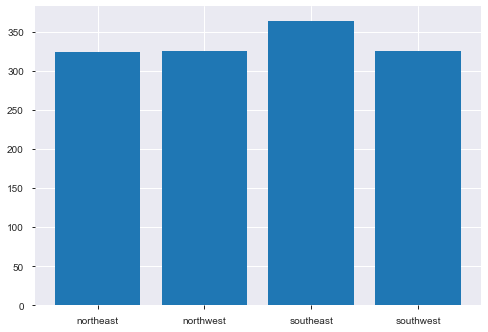

In [11]:

plt.bar(freq_table['region'], freq_table['Count'])
plt.show()


-So above we can see the total number of people in our four regions based on various feature in our data set like "how many children are in region north east= 324" respectively ,total number of charges that were charged per region for example southwest there were 325 charges made .

In [12]:
df_insurance.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [13]:
freq_table = df_insurance.groupby(['smoker']).size().reset_index(name='Count')
freq_table

,smoker,Count
0,no,1064
1,yes,274


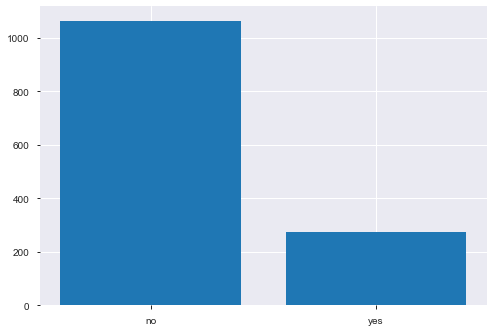

In [14]:
plt.bar(freq_table['smoker'], freq_table['Count'])
plt.show()

from above analysis we can see how many people smoke and do not smoke based on our features "age,sex,bmi,children,region	charges"

we have more people that smoke compared to those who does not smoke

In [15]:
df_insurance.groupby(['sex']).count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [16]:
freq_table = df_insurance.groupby(['sex']).size().reset_index(name='Count')
freq_table

,sex,Count
0,female,662
1,male,676


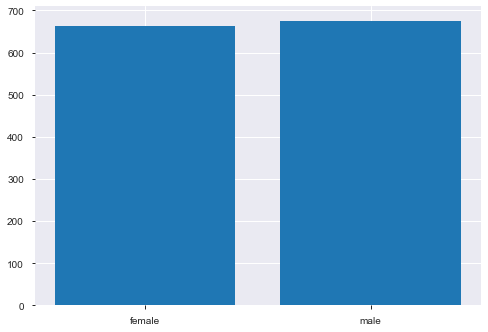

In [17]:
plt.bar(freq_table['sex'], freq_table['Count'])
plt.show()

above we can see number of females and male that were smokers,charged based on gender respectively

as we can see from our chart the data is almost perfectly distrubuted based on gender

# Univariate Analysis¶
Numerical Variables

In [18]:
df_insurance['charges'].max()

63770.42801

In [19]:
df_insurance['charges'].mean()

13270.422265141257

In [20]:
df_insurance['charges'].mode()

0    1639.5631
dtype: float64

In [21]:
df_insurance['charges'].median()

9382.033

In [22]:
df_insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Text(0, 0.5, 'count')

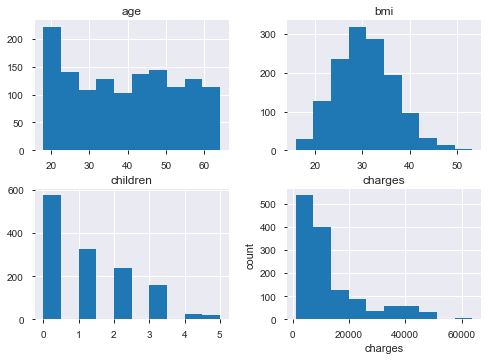

In [23]:
df_insurance.hist()
plt.title("charges")
plt.xlabel('charges')
plt.ylabel('count')

In [24]:
df_insurance.groupby(['age']).count()

,sex,bmi,children,smoker,region,charges
age,,,,,,
18,69,69,69,69,69,69
19,68,68,68,68,68,68
20,29,29,29,29,29,29
21,28,28,28,28,28,28
22,28,28,28,28,28,28
23,28,28,28,28,28,28
24,28,28,28,28,28,28
25,28,28,28,28,28,28
26,28,28,28,28,28,28


In [25]:
freq_table = df_insurance.groupby(['age']).size().reset_index(name='Count')
freq_table.head()

,age,Count
0,18,69
1,19,68
2,20,29
3,21,28
4,22,28


# the histogram shows the distrubution of age within our dataset

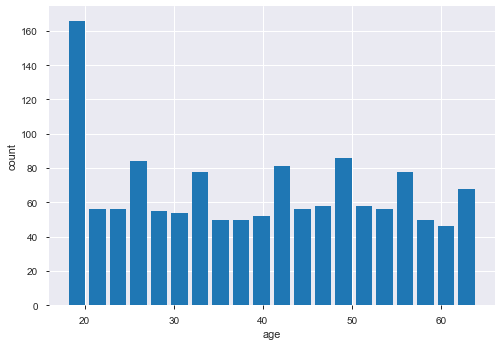

In [26]:
plt.hist(df_insurance.age,bins=20,rwidth=0.8)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

-- as we can see from our barchart ,most of the people are people that have age range below 20 and the rest is normal distrubuted from above 20 to above 60 years

In [27]:
numerical_continous=df_insurance[['age','charges','bmi']]
numerical_continous.shape

(1338, 3)

In [28]:
numerical_discrete=df_insurance['children']
numerical_discrete.head()

0    0
1    1
2    3
3    0
4    0
Name: children, dtype: int64

# NUMERICAL VARIABLE¶

In [29]:
# make a list of the numerical variables first
numerical = [var for var in df_insurance.columns if df_insurance[var].dtype!='O']
print(numerical)


['age', 'bmi', 'children', 'charges']


# checking and removing outliers in numerical_continous data by z-score

In [30]:
# find continuous variables
# let's remember to skip the target label variable charges, which is numerical

numerical_continous = [var for var in numerical if var not in numerical_discrete and var not in ['charges']]
print('There are {} numerical_continuous variables'.format(len(numerical_continous)))

There are 3 numerical_continuous variables


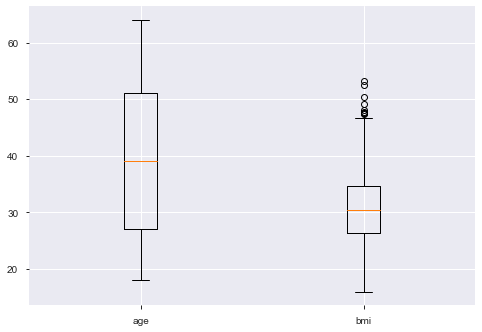

In [104]:
outliers=df_insurance
plt.boxplot([outliers.age, outliers.bmi] , labels = ['age' , 'bmi'])
plt.show()

In [105]:
from scipy import stats
z=np.abs(stats.zscore(outliers.bmi))
print(z)

[0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]


In [106]:
outliers.shape

(1338, 7)

In [107]:
threshold=2
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64),)


In [108]:
df_new=outliers[(z< 2)]
print(df_new)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1281 rows x 7 columns]


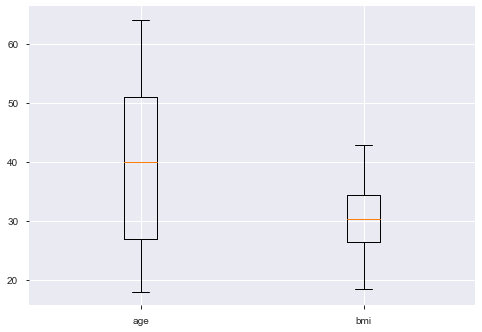

In [109]:
plt.boxplot([df_new.age, df_new.bmi] , labels = ['age' , 'bmi'])
plt.show()


THE PLOT ABOVE SHOWS NO MORE OUTLIERS, IT SHOWS THAT WITH THRESHOLD OF 2, MEANING IF WE MAKE OUR OUTPUT TO BE BETWEEN -2 AND 2, WE ELIMANATE OUTLIERS.

In [110]:
# find categorical variables
categorical = [var for var in df_insurance.columns if df_insurance[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [111]:

for var in df_insurance.columns :
      if df_insurance[var].dtype=='O':
             print(var)
             #print('There are {} categorical variables'.format(len(categorical)))

sex
smoker
region


In [112]:
# let's visualise the values of the discrete variables
numerical_discrete = []

for var in numerical:
    if len(df_insurance[var].unique())<20:
        print(var, ' values: ', df_insurance[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [113]:
discrete_variables=df_insurance['children']
discrete_variables.head()


0    0
1    1
2    3
3    0
4    0
Name: children, dtype: int64

<AxesSubplot:xlabel='children'>

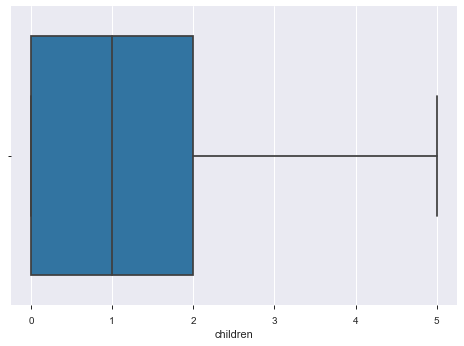

In [114]:
import seaborn as sns
sns.boxplot(x=df_insurance['children'])

there are no outliers in age so theres no further analysis required

In [115]:
# categorical features
categorical_variables=df_insurance[["sex", "smoker","region"]]
categorical_variables.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [116]:
categorical_variables.isna().sum()

sex       0
smoker    0
region    0
dtype: int64

# encoding categorical features 

In [117]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
onehotencod = OneHotEncoder(sparse=False)

In [123]:
# making a new clean dataframe
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [149]:
# categorical features
obj_df = df_new.select_dtypes(include=['object']).copy()
obj_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [150]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)


In [151]:
ohe.fit_transform(df_new[["sex"]])

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [152]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [153]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['sex', 'smoker','region']),
    remainder='passthrough')

In [200]:
column_trans.fit_transform(df_new)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [201]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [202]:
dummies=pd.get_dummies(df_new.sex)
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [203]:
merge_1=pd.concat([df_new,dummies],axis="columns")
merge_1

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [204]:
df2=merge_1.drop(["sex"],axis="columns")
df2

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


In [205]:
dummies1=pd.get_dummies(df_new.smoker)
dummies1

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [206]:
merge_2=pd.concat([df2,dummies1],axis="columns")
merge_2

,age,bmi,children,smoker,region,charges,female,male,no,yes
0,19,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,28.880,0,no,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,no,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0,1,0


In [207]:
merge_3=merge_2.drop(["smoker"],axis="columns")
merge_3

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0


In [208]:
dummies2=pd.get_dummies(df_new.region)
dummies2

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [209]:
merge_4=pd.concat([merge_3,dummies2],axis="columns")
merge_4

,age,bmi,children,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0,0,0,0,1


In [210]:
# this is the final clean and encoded dataset
encoded_df=merge_4.drop(["region"],axis="columns")
encoded_df

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [219]:
#separating target variable from features
# creating x(all feature columns except target)
x=encoded_df.drop("charges",axis=1)

# creating y (the output column)
y=encoded_df['charges']

In [220]:
#features
x


,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [222]:
#Target variable
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1281, dtype: float64